# Modules

Esta tabla contiene la información a nivel de fichero (módulo).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('modules')

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point', 'module__expertise_level']
TABLE_TARGET = 'module__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-06 14:53:20.171935 Data cache files found ...
2024-05-06 14:53:20.187565 Data cache files successfully loaded!!
Features shape: (18226, 14)
Target shape: (18226,)
As we can see the downloaded data contains a total of 18226 instances. Each of the instances corresponds to a program. For each program we have 14 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [23]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              18226 non-null  object 
 1   module__has_doc_string               18226 non-null  bool   
 2   module__global_stmts_pct             18226 non-null  float64
 3   module__global_expressions           18226 non-null  float64
 4   module__number_of_classes            18226 non-null  int64  
 5   module__number_of_functions          18226 non-null  int64  
 6   module__class_defs_pct               18226 non-null  float64
 7   module__function_defs_pct            18226 non-null  float64
 8   module__enum_defs_pct                18226 non-null  float64
 9   module__average_stmts_function_body  18226 non-null  float64
 10  module__average_stmts_method_body    18226 non-null  float64
 11  module__type_annotations_pct

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [24]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 39.09% instances for BEGINNER class and 60.91% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [25]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [43.13%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [26]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions             0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
module__expertise_level                0
dtype: int64

In [27]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions
--------------------------
0 instancias no tienen un valor para la columna module__global_expressions


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__function_defs_

### 2.4 - Describimos los valores de las variables de la tabla.

In [28]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,18226,6,SnakeCase,8629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,18226,1,False,18226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,18226.0,NaN,NaN,NaN,0.227542,0.271846,0.0,0.0,0.125,0.333333,1.0
module__global_expressions,18226.0,NaN,NaN,NaN,0.094516,0.171585,0.0,0.0,0.0,0.125,1.0
module__number_of_classes,18226.0,NaN,NaN,NaN,1.047899,3.35827,0.0,0.0,0.0,1.0,113.0
module__number_of_functions,18226.0,NaN,NaN,NaN,2.523044,6.308384,0.0,0.0,1.0,3.0,258.0
module__class_defs_pct,18226.0,NaN,NaN,NaN,0.31924,0.429019,0.0,0.0,0.0,0.888889,1.0
module__function_defs_pct,18226.0,NaN,NaN,NaN,0.458978,0.464533,0.0,0.0,0.333333,1.0,1.0
module__enum_defs_pct,18226.0,NaN,NaN,NaN,0.003743,0.045174,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,18226.0,NaN,NaN,NaN,2.732112,3.928782,0.0,0.0,1.25,4.4,53.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias). Revisar programa con 3k modulos y 1k paquetes.

In [29]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "module__number_of_classes": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 238
    "module__type_annotations_pct": [(0, 0), (0, 1.0)], # min: 0 max: 1297
    "module__average_stmts_function_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__average_stmts_method_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__global_expressions": [(0,0), (0, inf)], # min: 0 max: 26
    "module__global_stmts_pct": [(0, 0), (0, inf)]
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'program__has_packages'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]  10582   58.059914
             [1.0_1.0]   4530   24.854603
             [0.0_1.0)   3114   17.085482

module__function_defs_pct  count  percentage
                [0.0_0.0]   8602   47.196313
                [1.0_1.0]   6570   36.047405
                [0.0_1.0)   3054   16.756282

module__enum_defs_pct  count  percentage
            [0.0_0.0]  18037    98.96302
            [0.0_inf]    189     1.03698

module__number_of_classes  count  percentage
                  unknown  10582   58.059914
                    [1_1]   4684   25.699550
                    [2_2]   1278    7.011961
                  [4_inf]   1192    6.540108
                    [3_3]    490    2.688467

module__number_of_functions  count  percentage
                    [0_inf]   9624   52.803687
                      [0_0]   8602   47.196313

module__type_annotations_pct  count  percentage
                       [0_0]  12754   69.9

KeyError: 'program__has_packages'

In [30]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (18226, 20)
Target shape: (18226,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

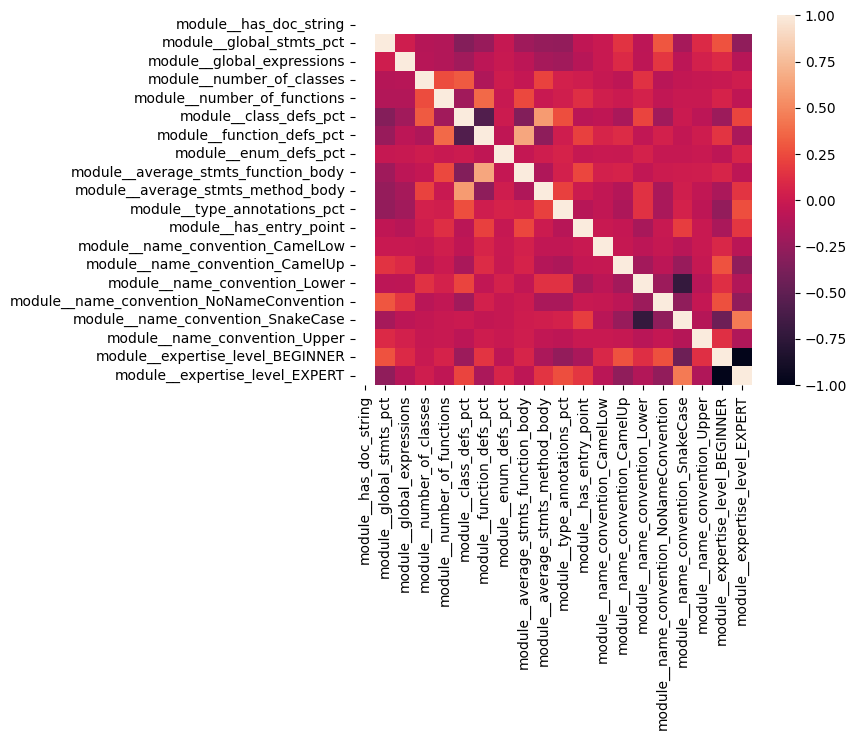

In [33]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable has_doc_string (1/14)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

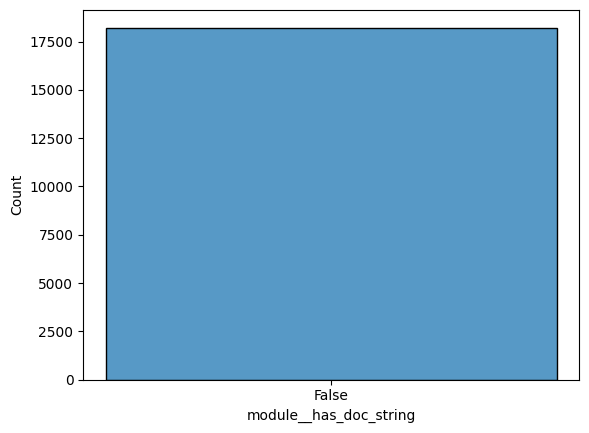

In [2]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

Siempre toma el valor false. Habría que analizar si es un fallo de toma de datos o es realidad que ningún fichero tiene doc_string.

In [3]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 0 valores verdaderos y 18226 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.0.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 1.0.


In [4]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de False en un 100.0% de los items.
La variable module__has_doc_string toma el valor de True en un 0.0% de los items. [OUTLIER]


In [5]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
unique,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_entry_point (2/14)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

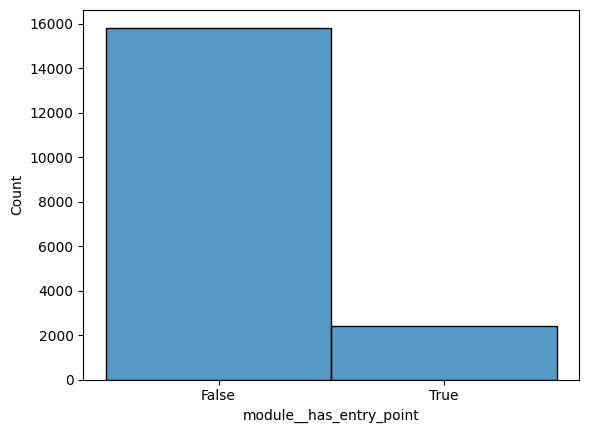

In [6]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [7]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 2395 valores verdaderos y 15831 valores falsos. Y, la desviación típica es de 0.3378527683464323
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.13140568418742457.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.8685943158125754.


In [8]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de False en un 86.86% de los items.
La variable module__has_entry_point toma el valor de True en un 13.14% de los items.


In [9]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,2395,2395,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395,2395
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,EXPERT
freq,1720,2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2395,1934
mean,NaN,NaN,0.187452,0.049996,1.197495,4.492693,0.230002,0.706170,0.000780,5.066611,1.702623,0.079709,NaN,NaN
std,NaN,NaN,0.148189,0.098127,5.187044,6.920440,0.374196,0.412321,0.016772,5.371254,4.028246,0.194814,NaN,NaN
min,NaN,NaN,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.083333,0.000000,0.000000,1.000000,0.000000,0.380042,0.000000,1.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.142857,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,0.250000,0.066667,1.000000,5.000000,0.333333,1.000000,0.000000,7.000000,2.584627,0.000000,NaN,NaN


### Variable number_of_classes (3/14)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1,047899.

<Axes: ylabel='module__number_of_classes'>

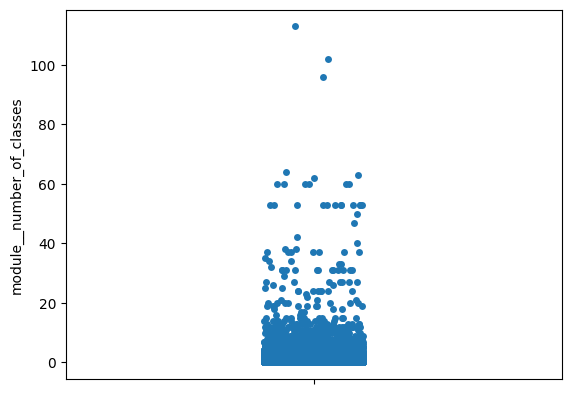

In [10]:
sns.stripplot(X['module__number_of_classes'])

In [11]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9807830490865828
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0484474504803334,76.83783453406213]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1682 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 9.229% del total de instancias.
+3.0IQR: 839 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 4.603% del total de instancias.
L: 0 instancias tienen

In [15]:
X[X['module__number_of_classes'] > 80].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,3,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3,3
unique,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
mean,NaN,NaN,0.020280,0.144219,103.666667,3.000000,0.971435,0.028565,0.0,3.041667,2.380624,0.129630,NaN,NaN
std,NaN,NaN,0.018173,0.235638,8.621678,4.358899,0.042108,0.042108,0.0,4.430599,0.982732,0.224525,NaN,NaN
min,NaN,NaN,0.000000,0.007576,96.000000,0.000000,0.923077,0.000000,0.0,0.000000,1.793389,0.000000,NaN,NaN
25%,NaN,NaN,0.012876,0.008174,99.000000,0.500000,0.957152,0.004386,0.0,0.500000,1.813361,0.000000,NaN,NaN
50%,NaN,NaN,0.025751,0.008772,102.000000,1.000000,0.991228,0.008772,0.0,1.000000,1.833333,0.000000,NaN,NaN
75%,NaN,NaN,0.030419,0.212540,107.500000,4.500000,0.995614,0.042848,0.0,4.562500,2.674242,0.194444,NaN,NaN


Hay que revisar los tres casos con un número de clases mayor que 80.

### Variable number_of_functions (4/14)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.523044.

<Axes: ylabel='module__number_of_functions'>

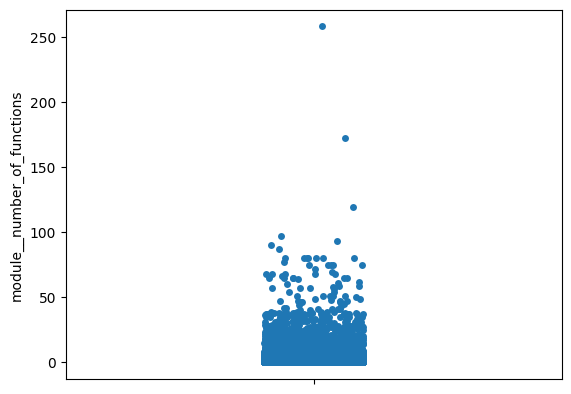

In [17]:
sns.stripplot(X['module__number_of_functions'])

In [18]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.926296011521661
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17587906627666205,185.95888269384145]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 1523 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 8.356% del total de instancias.
+3.0IQR: 739 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.055% del total de instancias.
L: 

In [19]:
X[X['module__number_of_functions'] > 100].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,3,3,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3,3
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
mean,NaN,NaN,0.215283,0.006446,22.333333,183.00000,0.075807,0.924193,0.0,4.432160,3.104839,0.000709,NaN,NaN
std,NaN,NaN,0.360492,0.006882,34.355980,70.14984,0.102142,0.102142,0.0,0.450294,1.858044,0.001228,NaN,NaN
min,NaN,NaN,0.000000,0.002247,2.000000,119.00000,0.016529,0.806250,0.0,3.949580,2.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.007194,0.002475,2.500000,145.50000,0.016836,0.894554,0.0,4.227697,2.032258,0.000000,NaN,NaN
50%,NaN,NaN,0.014388,0.002703,3.000000,172.00000,0.017143,0.982857,0.0,4.505814,2.064516,0.000000,NaN,NaN
75%,NaN,NaN,0.322925,0.008546,32.500000,215.00000,0.105446,0.983164,0.0,4.673450,3.657258,0.001064,NaN,NaN


Hay que analizar los 3 ficheros con más de 100 funciones.

### Variable average_stmts_function_body (5/14)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.732112.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

Habría que analizar porque la media es tan solo de 2.73

<Axes: ylabel='module__average_stmts_function_body'>

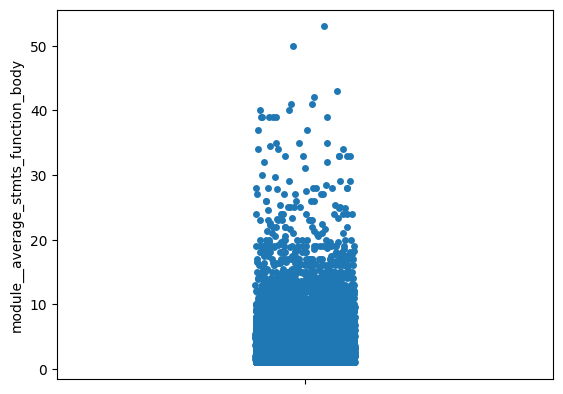

In [26]:
sns.stripplot(X[X['module__number_of_functions'] > 0]['module__average_stmts_function_body'])

In [28]:
print_outliers_for_df_column(X[X['module__number_of_functions'] > 0], 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6546632407784363
Rango valores atípicos extremos (Tukey): [-6.0,15.0]
Rango valores atípicos leves (Tukey): [-1.5,10.5]
Rango valores atípicos extremos (Fixed BoxPlot): [2.5449026586812966,67.72755081726842]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.0 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -1.5 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 703 instancias tienen un valor para module__average_stmts_function_body superior a 10.5 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 7.305% del total de instancias.
+3.0IQR: 260 instancias tienen un valor para module__average_stmts_function_body superior a 15.0 (Q3-3*IQR) para module__average_stmts_func

In [31]:
X[(X['module__number_of_functions'] > 0) & (X['module__average_stmts_function_body'] > 17.6)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,176,176,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,176.000000,176,176
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,96,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,118
mean,NaN,NaN,0.101837,0.067626,0.329545,2.437500,0.052650,0.947350,0.0,24.608382,0.528263,0.119484,NaN,NaN
std,NaN,NaN,0.133602,0.134151,1.375056,3.930331,0.163809,0.163809,0.0,7.074607,2.200164,0.275378,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.0,17.666666,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.060181,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,22.291667,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,0.142857,0.071429,0.000000,2.000000,0.000000,1.000000,0.0,28.000000,0.000000,0.000000,NaN,NaN


In [33]:
X[X['module__average_stmts_function_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,8602,8602,8602.000000,8602.000000,8602.000000,8602.0,8602.000000,8602.0,8602.000000,8602.0,8602.000000,8602.000000,8602,8602
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,4228,8602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8073,5826
mean,NaN,NaN,0.303219,0.115293,1.038363,0.0,0.532338,0.0,0.005676,0.0,2.151120,0.126504,NaN,NaN
std,NaN,NaN,0.328776,0.202941,2.720165,0.0,0.496957,0.0,0.060228,0.0,3.013769,0.227767,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.166667,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,NaN,NaN
75%,NaN,NaN,0.500000,0.166667,1.000000,0.0,1.000000,0.0,0.000000,0.0,3.500000,0.166667,NaN,NaN


8602 ficheros con una media de 0 sentencias por funcion es muy raro. Vamos a realizar esta medición condicionado a tener al menos una función.

In [32]:
X[(X['module__number_of_functions'] > 0) & (X['module__average_stmts_function_body'] == 0.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
unique,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a describir esta variable condicionada a tener al menos una función para ver la media real.

In [34]:
X[X['module__number_of_functions'] > 0]['module__average_stmts_function_body'].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

count    9624.000000
mean        5.174093
std         4.073896
min         1.000000
25%         3.000000
50%         4.166666
75%         6.000000
max        53.000000
Name: module__average_stmts_function_body, dtype: float64

### Variable average_stmts_method_body (6/14)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 1.66441.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

<Axes: ylabel='module__average_stmts_method_body'>

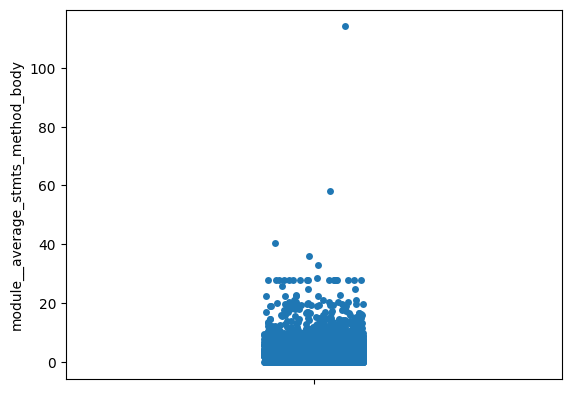

In [35]:
sns.stripplot(X[X['module__number_of_classes'] > 0]['module__average_stmts_method_body'])

In [36]:
print_outliers_for_df_column(X[X['module__number_of_classes'] > 0], 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5458379382386074
Rango valores atípicos extremos (Tukey): [-9.9999999,13.3333332]
Rango valores atípicos leves (Tukey): [-4.99999995,8.33333325]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.7400815609177314,47.71336604730764]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -9.9999999 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -4.99999995 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 270 instancias tienen un valor para module__average_stmts_function_body superior a 8.33333325 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 3.532% del total de instancias.
+3.0IQR: 72 instancias tienen un valor para module__average_stmts_function_body superior a 13.

In [37]:
X[(X['module__number_of_classes'] > 0) & (X['module__average_stmts_method_body'] > 13.3)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,126,126,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126,126
unique,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,76,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,69
mean,NaN,NaN,0.086887,0.029340,1.531746,2.793651,0.740906,0.258301,0.000794,1.968449,20.464260,0.189326,NaN,NaN
std,NaN,NaN,0.104020,0.056711,1.348697,5.660131,0.367002,0.366585,0.008909,4.061021,10.529602,0.248593,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.041667,0.000000,0.000000,0.000000,13.333333,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,15.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.076923,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,NaN,NaN
75%,NaN,NaN,0.116013,0.034483,2.000000,2.750000,1.000000,0.666667,0.000000,3.812500,22.166666,0.400000,NaN,NaN


Hay que revisar ese con el máximo de 114

In [38]:
X[X['module__average_stmts_method_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,10897,10897,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.0,10897.000000,10897,10897
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,5093,10897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9341,5729
mean,NaN,NaN,0.304719,0.128999,0.074699,2.578875,0.016790,0.616656,0.001866,3.379203,0.0,0.080567,NaN,NaN
std,NaN,NaN,0.309368,0.205996,0.952487,5.093549,0.116849,0.483068,0.038802,4.355985,0.0,0.218878,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
50%,NaN,NaN,0.200000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.428571,0.0,0.000000,NaN,NaN
75%,NaN,NaN,0.500000,0.200000,0.000000,3.000000,0.000000,1.000000,0.000000,5.000000,0.0,0.000000,NaN,NaN


Vamos a describir la variable condicionada a tener al menos una clase

In [39]:
X[(X['module__number_of_classes'] > 0) & (X['module__average_stmts_method_body'] == 0.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
count,322,322,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.0,322.000000,322,322
unique,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,EXPERT
freq,189,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284,190
mean,NaN,NaN,0.164754,0.063826,2.527950,4.295031,0.568208,0.425522,0.006270,3.030184,0.0,0.171610,NaN,NaN
std,NaN,NaN,0.230221,0.104669,4.957215,7.113887,0.386218,0.387151,0.051157,3.702365,0.0,0.279425,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.175889,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
50%,NaN,NaN,0.060662,0.005435,1.000000,2.000000,0.500000,0.500000,0.000000,2.416667,0.0,0.000000,NaN,NaN
75%,NaN,NaN,0.213745,0.073317,2.000000,5.000000,1.000000,0.818182,0.000000,4.800000,0.0,0.500000,NaN,NaN


Vamos a describir la variable completa condicionada a que tenga al menos una clase.

In [40]:
X[X['module__number_of_classes'] > 0]['module__average_stmts_method_body'].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

count    7644.000000
mean        3.966793
std         3.355343
min         0.000000
25%         2.200000
50%         3.333333
75%         4.909091
max       114.000000
Name: module__average_stmts_method_body, dtype: float64